In [2]:
import geopandas as gdp
import glob
import os
import zipfile


Read over nhru shapefiles in directory

In [3]:
directory = r'C:\Users\rmcd\Documents\oNHM\GeospatialFabric_1\nhru'
os.chdir(directory)
# filenames = glob.glob('*_[0-1]*.zip')
for idx, name in enumerate(glob.glob('*_[0-1]*.zip')):
    print(idx, name)

0 nhru_01.zip
1 nhru_02.zip
2 nhru_12.zip


In [4]:
directory = r'C:\Users\rmcd\Documents\oNHM\GeospatialFabric_1\nhru'
unzip_dir = r'C:\Users\rmcd\Documents\oNHM\GeospatialFabric_1\nhru\unzip'
os.chdir(directory)
# filenames = glob.glob('*_[0-1]*.zip')
for idx, name in enumerate(glob.glob('*_[0-1]*.zip')):
    print(idx, name)
    if idx == 1:
        #unzip file
        zip_ref = zipfile.ZipFile(name, 'r')
        zip_ref.extractall(unzip_dir)
        zip_ref.close()
        (prefix, sep, suffix) = name.rpartition('.')
        shp_name = prefix+r'.shp'
        os.chdir(unzip_dir)
        print(shp_name)
        data = gdp.read_file(shp_name)
        print(data.head())
        break

0 nhru_01.zip
1 nhru_02.zip
nhru_02.shp
     POI_ID  hru_id_nat  hru_id_reg region  \
0  10054896        2463           1     02   
1  10054896        2464           2     02   
2  10054884        2465           3     02   
3  10054884        2466           4     02   
4   8526515        2467           5     02   

                                            geometry  
0  POLYGON ((-76.58883845899999 36.74653056200003...  
1  (POLYGON ((-76.46904191499993 36.7791440250000...  
2  POLYGON ((-76.65698387399993 36.85365225800007...  
3  POLYGON ((-76.62364401799994 36.86489843200007...  
4  POLYGON ((-79.99363256999999 37.44257329500005...  


<class 'geopandas.geodataframe.GeoDataFrame'>


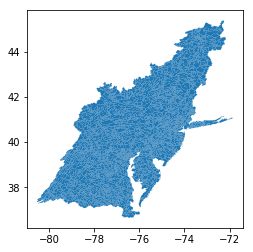

In [5]:
%matplotlib inline
print(type(data))
data.plot();

Get area of each polygon.  Area is in decimal degrees so need to convert to m or km.  According to https://gis.stackexchange.com/questions/218450/getting-polygon-areas-using-geopandas using epsg:3395 is an equal area projection and will follow the code there to get area in m & km.  But need to confirm with others that is an appropriate projection to use.

Also here https://annefou.github.io/metos_python/03-crs_proj/ states that epsg:2163  in US National Atlas equal area

Projection makes a difference!  also tried ESRI:102003

From here: https://gis.stackexchange.com/questions/141580/which-projection-is-best-for-mapping-the-contiguous-united-states

EPSG:102003 USA_Contiguous_Albers_Equal_Area_Conic
+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs

EPSG:102004 USA_Contiguous_Lambert_Conformal_Conic
+proj=lcc +lat_1=33 +lat_2=45 +lat_0=39 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs

EPSG:102005 USA_Contiguous_Equidistant_Conic
+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs

In [7]:
data_m = data.to_crs({'init': 'epsg:4326'})
for index, row in data_m[0:4].iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:10.6f}".format(index, poly_area))
    
data_m = data.to_crs({'init': 'esri:102003'})
for index, row in data_m[0:4].iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:10.3f}".format(index, poly_area))
    
data_m = data.to_crs({'init': 'esri:102004'})
for index, row in data_m[0:4].iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:10.3f}".format(index, poly_area))
    
data_m = data.to_crs({'init': 'esri:102005'})
for index, row in data_m[0:4].iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:10.3f}".format(index, poly_area))

Polygon area at index 0 is:   0.000878
Polygon area at index 1 is:   0.008693
Polygon area at index 2 is:   0.009149
Polygon area at index 3 is:   0.002181
Polygon area at index 0 is: 8699886.413
Polygon area at index 1 is: 86158177.089
Polygon area at index 2 is: 90588969.206
Polygon area at index 3 is: 21595475.951
Polygon area at index 0 is: 8619038.287
Polygon area at index 1 is: 85361084.018
Polygon area at index 2 is: 89740846.701
Polygon area at index 3 is: 21392872.585
Polygon area at index 0 is: 8659804.170
Polygon area at index 1 is: 85763058.698
Polygon area at index 2 is: 90168391.463
Polygon area at index 3 is: 21494999.260


In [24]:
print(data_m.geom_type.head())

# for index, row in data_m.iterrows():
#     print(index, row.geom_type())

0         Polygon
1    MultiPolygon
2         Polygon
3         Polygon
4         Polygon
dtype: object


From Geopandas docs (http://geopandas.org/data_structures.html):
# GeoSeries
A GeoSeries is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).

geopandas has three basic classes of geometric objects (which are actually shapely objects):

* Points / Multi-Points
* Lines / Multi-Lines
* Polygons / Multi-Polygons

Note that all entries in a GeoSeries need not be of the same geometric type, although certain export operations will fail if this is not the case.

Looking at the data above for nhru_2.shape the second hru has multiple polygons making for the hru_id_nat=2464 which can be viewed below when printing the hru.head().  The dissolve function was patterned from here https://www.earthdatascience.org/workshops/gis-open-source-python/dissolve-polygons-in-python-geopandas-shapely/

BUT, it is unecessary because hrus with multiple polygons are treated as multi-polygons. so lets check the comparison of area.

In [25]:
tmlt = data_m.explode()
# print(tmlt.head)
for index, row in tmlt[0:5].iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:10.3f}".format(index, poly_area))

Polygon area at index (0, 0) is: 8659804.170
Polygon area at index (1, 0) is:    907.444
Polygon area at index (1, 1) is:    882.760
Polygon area at index (1, 2) is: 85761268.494
Polygon area at index (2, 0) is: 90168391.463


In [27]:
test_split = 907.444+882.760+85761268.494 # values from index (1,0) - (1,2) representing the three polygons \
# that make up data_m in the cell above
initial = 85763058.698 #the combined area from data_m
print(test_split == initial)
# The test should be true indicating that the combined area is the same as the individual area

True


In [ ]:
hru = data_m[['hru_id_nat', 'geometry']]
hrus = hru.dissolve(by='hru_id_nat')
hrus = hrus.reset_index()
hrus.head()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
%matplotlib inline
fig, ax = plt.subplots(figsize= (10,10))

hrus[0:4].plot(column = 'hru_id_nat', ax = ax)
ax.set_axis_off()
plt.axis('equal')